In [2]:
import h5py
import ROOT
import numpy as np

Welcome to JupyROOT 6.26/04


In [3]:
#Extracting data
f1= h5py.File('dataset/user.alfroch.26622668._000001.output.h5', "a")
f2= h5py.File('dataset/user.alfroch.26622668._000002.output.h5', "a")
f13= h5py.File('dataset/user.alfroch.26622668._000013.output.h5', "a")
f26= h5py.File('dataset/user.alfroch.26622668._000026.output.h5', "a")
f67= h5py.File('dataset/user.alfroch.26622668._000067.output.h5', "a")
files = [f1, f2, f13, f26, f67]

In [4]:
#Sorting each data point to the corresponding jet type
label_dict = {5: "b_jet", 4: "c_jet", 0: "light_jet", 15: "tau_jet"}
def sort_jets(file, label):
    dataset = file["jets"]
    jet_data = dataset[dataset["HadronConeExclTruthLabelID"]==label]
    jet_grp = file.create_group(f"{label_dict[label]}")
    b_jet_dataset = jet_grp.create_dataset(f"{label_dict[label]}",
                                           data = jet_data, 
                                           dtype = dataset.dtype)

In [5]:
for file in files:
    for label in [5, 4, 0, 15]:
        sort_jets(file, label)

ValueError: Unable to create group (name already exists)

In [6]:
def concatenate_jets(label, feature):
    concatenate_array = []
    label_name = label_dict[label]
    for file in files:
        dataset = file[f"{label_name}"].get(label_name)
        feature_values = dataset.fields(feature)[:] #Extracting the corresponding feature value
        concatenate_array.append(feature_values)
    return np.concatenate(concatenate_array)

In [7]:
b_pt, c_pt, l_pt = concatenate_jets(5, "pt_btagJes"), concatenate_jets(4, "pt_btagJes"), concatenate_jets(0, "pt_btagJes")
b_eta, c_eta, l_eta = concatenate_jets(5, "eta_btagJes"), concatenate_jets(4, "eta_btagJes"), concatenate_jets(0, "eta_btagJes")
b_abs_eta, c_abs_eta, l_abs_eta = concatenate_jets(5, "absEta_btagJes"), concatenate_jets(4, "absEta_btagJes"), concatenate_jets(0, "absEta_btagJes")



In [8]:
print(np.min(b_abs_eta))

3.6302566e-07


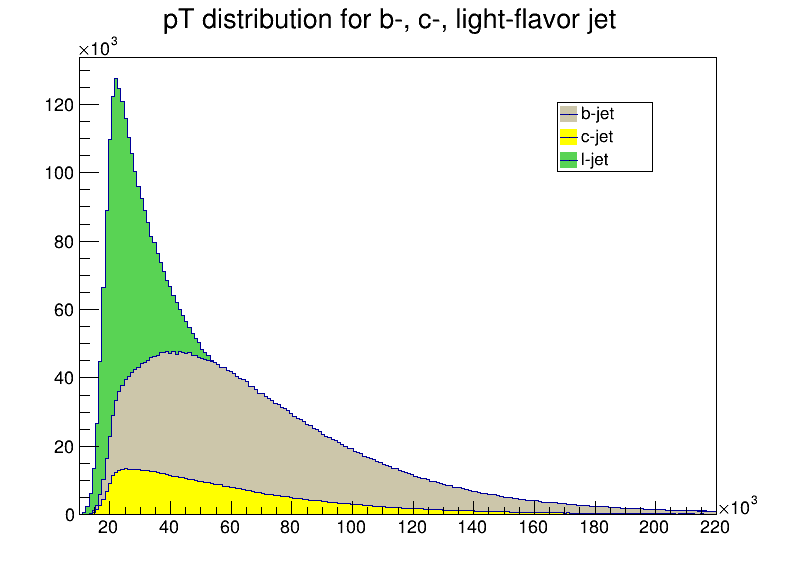

In [9]:
#Draw pT distribution for three jet
b_pT_plot = ROOT.TH1F("b-jet","pT distribution",200,1e4,2.2e5)
c_pT_plot = ROOT.TH1F("c-jet","pT distribution",200,1e4,2.2e5)
l_pT_plot = ROOT.TH1F("light-flavor jet","pT distribution",200,1e4,2.2e5)
b_pT_plot.SetFillColor(20)
c_pT_plot.SetFillColor(5)
l_pT_plot.SetFillColor(8)
#
b_pT_plot.GetYaxis().SetTitle("Number of events")
c_pT_plot.GetYaxis().SetTitle("Number of events")
l_pT_plot.GetYaxis().SetTitle("Number of events")
#
for i in b_pt:
    b_pT_plot.Fill(i)
for i in c_pt:
    c_pT_plot.Fill(i)
for i in l_pt:
    l_pT_plot.Fill(i)
stack = ROOT.THStack("stack", "pT distribution for b-, c-, light-flavor jet")
stack.Add(l_pT_plot)
stack.Add(b_pT_plot)
stack.Add(c_pT_plot)
c = ROOT.TCanvas("myCanvasName","The Canvas Title",800,600)
stack.Draw("nostack")
c.Draw()
legend = ROOT.TLegend(0.7, 0.7 ,0.82 ,0.82)
legend.AddEntry(b_pT_plot, "b-jet")
legend.AddEntry(c_pT_plot, "c-jet")
legend.AddEntry(l_pT_plot, "l-jet")
legend.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: b-jet (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: c-jet (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: light-flavor jet (Potential memory leak).


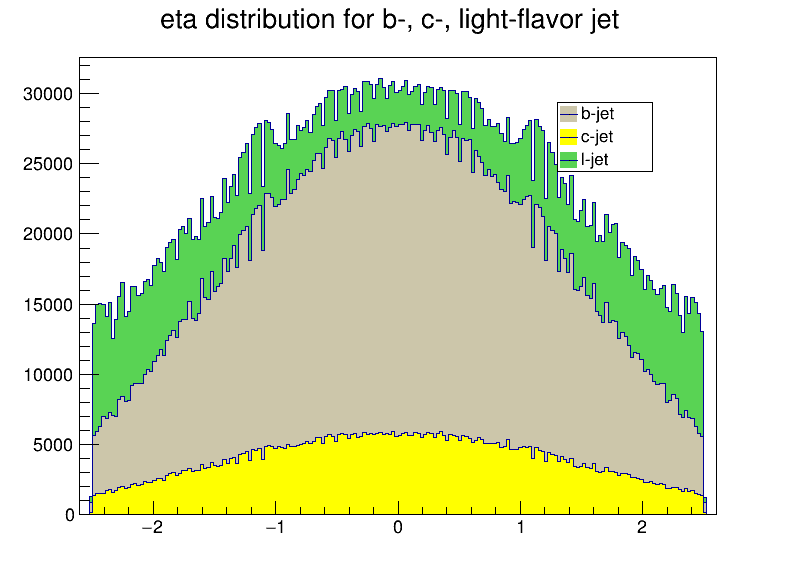

In [10]:
#Draw eta distribution for three jet
b_pT_plot = ROOT.TH1F("b-jet","eta distribution",200,-2.6,2.6)
c_pT_plot = ROOT.TH1F("c-jet","eta distribution",200,-2.6,2.6)
l_pT_plot = ROOT.TH1F("light-flavor jet","eta distribution",200,-2.6,2.6)
b_pT_plot.SetFillColor(20)
c_pT_plot.SetFillColor(5)
l_pT_plot.SetFillColor(8)
b_pT_plot.GetYaxis().SetTitle("Number of events")
c_pT_plot.GetYaxis().SetTitle("Number of events")
l_pT_plot.GetYaxis().SetTitle("Number of events")
for i in b_eta:
    b_pT_plot.Fill(i)
for i in c_eta:
    c_pT_plot.Fill(i)
for i in l_eta:
    l_pT_plot.Fill(i)
stack = ROOT.THStack("stack", "eta distribution for b-, c-, light-flavor jet")
stack.Add(l_pT_plot)
stack.Add(b_pT_plot)
stack.Add(c_pT_plot)
c = ROOT.TCanvas("eta canvas","The Canvas Title",800,600)
stack.Draw("nostack")
c.Draw()
legend = ROOT.TLegend(0.7, 0.7 ,0.82 ,0.82)
legend.AddEntry(b_pT_plot, "b-jet")
legend.AddEntry(c_pT_plot, "c-jet")
legend.AddEntry(l_pT_plot, "l-jet")
legend.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: b-jet (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: c-jet (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: light-flavor jet (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: eta canvas


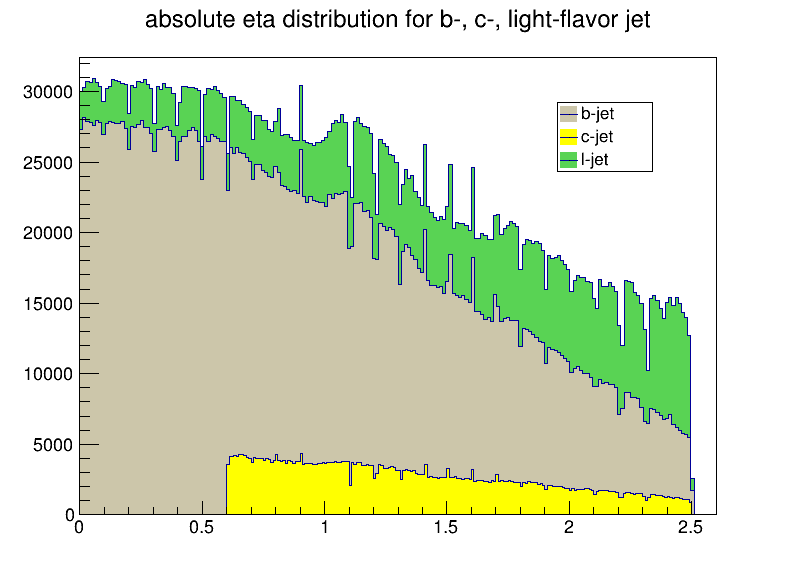

In [11]:
#Draw absolute eta distribution for three jet
b_pT_plot = ROOT.TH1F("b-jet","abseta distribution",200,0,2.6)
c_pT_plot = ROOT.TH1F("c-jet","abseta distribution",200,0.6,2.6)
l_pT_plot = ROOT.TH1F("light-flavor jet","abseta distribution",200,0,2.6)
b_pT_plot.SetFillColor(20)
c_pT_plot.SetFillColor(5)
l_pT_plot.SetFillColor(8)
b_pT_plot.GetYaxis().SetTitle("Number of events")
c_pT_plot.GetYaxis().SetTitle("Number of events")
l_pT_plot.GetYaxis().SetTitle("Number of events")
for i in b_abs_eta:
    b_pT_plot.Fill(i)
for i in c_abs_eta:
    c_pT_plot.Fill(i)
for i in l_abs_eta:
    l_pT_plot.Fill(i)
stack = ROOT.THStack("stack", "absolute eta distribution for b-, c-, light-flavor jet")
stack.Add(l_pT_plot)
stack.Add(b_pT_plot)
stack.Add(c_pT_plot)
c = ROOT.TCanvas("eta canvas","The Canvas Title",800,600)
stack.Draw("nostack")
c.Draw()
legend = ROOT.TLegend(0.7, 0.7 ,0.82 ,0.82)
legend.AddEntry(b_pT_plot, "b-jet")
legend.AddEntry(c_pT_plot, "c-jet")
legend.AddEntry(l_pT_plot, "l-jet")
legend.Draw()

In [12]:
b_pb, c_pb, l_pb = concatenate_jets(5, "DL1r_pb"), concatenate_jets(4, "DL1r_pb"), concatenate_jets(0, "DL1r_pb")
b_pc, c_pc, l_pc = concatenate_jets(5, "DL1r_pc"), concatenate_jets(4, "DL1r_pc"), concatenate_jets(0, "DL1r_pc")
b_pu, c_pu, l_pu = concatenate_jets(5, "DL1r_pu"), concatenate_jets(4, "DL1r_pu"), concatenate_jets(0, "DL1r_pu")


Warning in <TROOT::Append>: Replacing existing TH1: b-jet (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: c-jet (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: light-flavor jet (Potential memory leak).


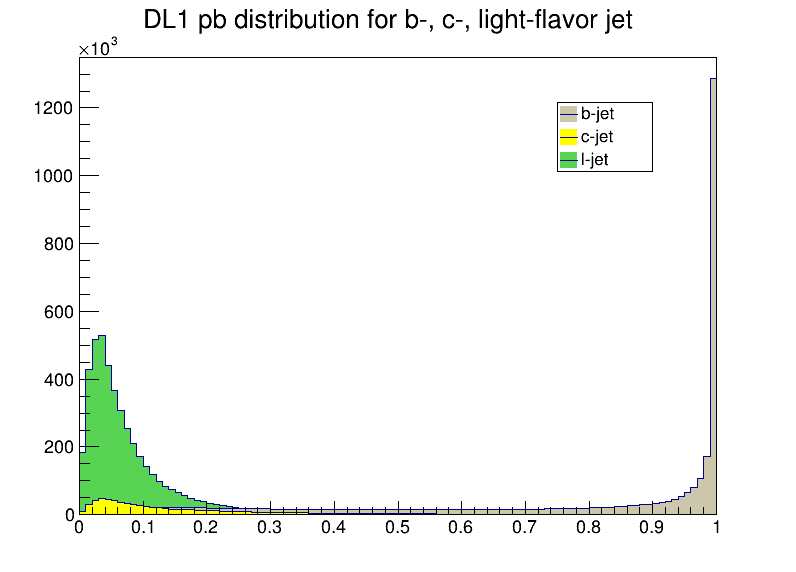

In [13]:
#Draw pT distribution for three jet
b_pT_plot = ROOT.TH1F("b-jet","pb distribution",100,0,1)
c_pT_plot = ROOT.TH1F("c-jet","pb distribution",100,0,1)
l_pT_plot = ROOT.TH1F("light-flavor jet","pb distribution",100,0,1)
b_pT_plot.SetFillColor(20)
c_pT_plot.SetFillColor(5)
l_pT_plot.SetFillColor(8)
b_pT_plot.GetYaxis().SetTitle("Number of events")
c_pT_plot.GetYaxis().SetTitle("Number of events")
l_pT_plot.GetYaxis().SetTitle("Number of events")
for i in b_pb:
    b_pT_plot.Fill(i)
for i in c_pb:
    c_pT_plot.Fill(i)
for i in l_pb:
    l_pT_plot.Fill(i)
stack = ROOT.THStack("pb stack", "DL1 pb distribution for b-, c-, light-flavor jet")
stack.Add(l_pT_plot)
stack.Add(b_pT_plot)
stack.Add(c_pT_plot)
c = ROOT.TCanvas("pb","The Canvas Title",800,600)
stack.Draw("nostack")
c.Draw()
legend = ROOT.TLegend(0.7, 0.7 ,0.82 ,0.82)
legend.AddEntry(b_pT_plot, "b-jet")
legend.AddEntry(c_pT_plot, "c-jet")
legend.AddEntry(l_pT_plot, "l-jet")
legend.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: b-jet (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: c-jet (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: light-flavor jet (Potential memory leak).


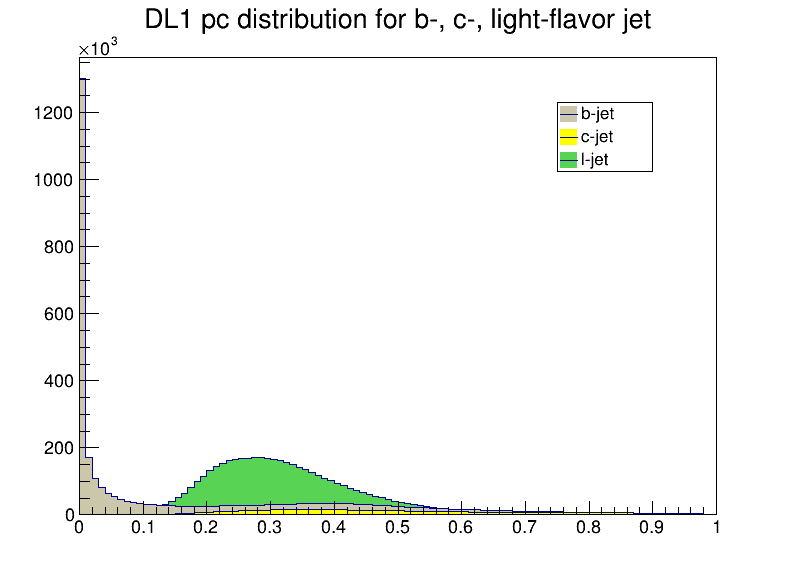

In [14]:
#Draw pT distribution for three jet
b_pT_plot = ROOT.TH1F("b-jet","pc distribution",100,0,1)
c_pT_plot = ROOT.TH1F("c-jet","pc distribution",100,0,1)
l_pT_plot = ROOT.TH1F("light-flavor jet","pc distribution",100,0,1)
b_pT_plot.SetFillColor(20)
c_pT_plot.SetFillColor(5)
l_pT_plot.SetFillColor(8)
b_pT_plot.GetYaxis().SetTitle("Number of events")
c_pT_plot.GetYaxis().SetTitle("Number of events")
l_pT_plot.GetYaxis().SetTitle("Number of events")
for i in b_pc:
    b_pT_plot.Fill(i)
for i in c_pc:
    c_pT_plot.Fill(i)
for i in l_pc:
    l_pT_plot.Fill(i)
stack = ROOT.THStack("pc stack", "DL1 pc distribution for b-, c-, light-flavor jet")
stack.Add(l_pT_plot)
stack.Add(b_pT_plot)
stack.Add(c_pT_plot)
c = ROOT.TCanvas("pc","The Canvas Title",800,600)
stack.Draw("nostack")
c.Draw()
legend = ROOT.TLegend(0.7, 0.7 ,0.82 ,0.82)
legend.AddEntry(b_pT_plot, "b-jet")
legend.AddEntry(c_pT_plot, "c-jet")
legend.AddEntry(l_pT_plot, "l-jet")
legend.Draw()

Warning in <TROOT::Append>: Replacing existing TH1: b-jet (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: c-jet (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: light-flavor jet (Potential memory leak).


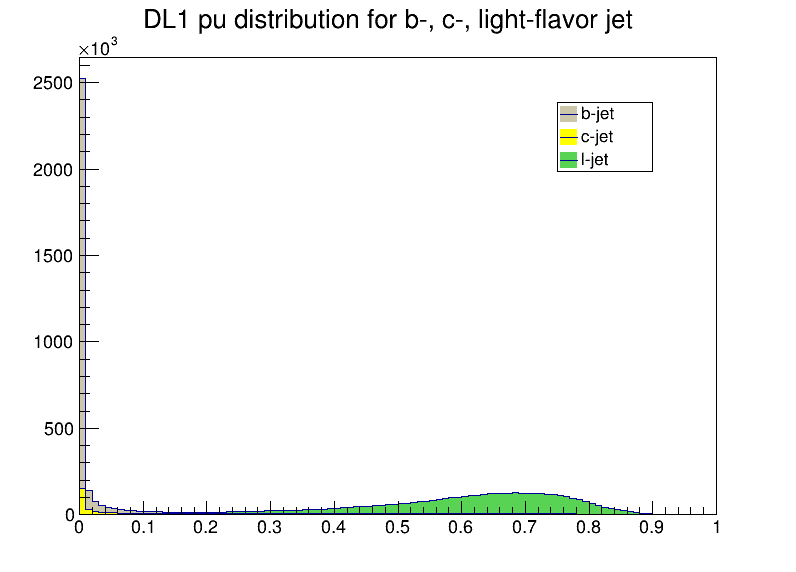

In [15]:
#Draw pT distribution for three jet
b_pT_plot = ROOT.TH1F("b-jet","pu distribution",100,0,1)
c_pT_plot = ROOT.TH1F("c-jet","pu distribution",100,0,1)
l_pT_plot = ROOT.TH1F("light-flavor jet","pu distribution",100,0,1)
b_pT_plot.SetFillColor(20)
c_pT_plot.SetFillColor(5)
l_pT_plot.SetFillColor(8)
b_pT_plot.GetYaxis().SetTitle("Number of events")
c_pT_plot.GetYaxis().SetTitle("Number of events")
l_pT_plot.GetYaxis().SetTitle("Number of events")
for i in b_pu:
    b_pT_plot.Fill(i)
for i in c_pu:
    c_pT_plot.Fill(i)
for i in l_pu:
    l_pT_plot.Fill(i)
stack = ROOT.THStack("pu stack", "DL1 pu distribution for b-, c-, light-flavor jet")
stack.Add(l_pT_plot)
stack.Add(b_pT_plot)
stack.Add(c_pT_plot)
c = ROOT.TCanvas("pu","The Canvas Title",800,600)
stack.Draw("nostack")
c.Draw()
legend = ROOT.TLegend(0.7, 0.7 ,0.82 ,0.82)
legend.AddEntry(b_pT_plot, "b-jet")
legend.AddEntry(c_pT_plot, "c-jet")
legend.AddEntry(l_pT_plot, "l-jet")
legend.Draw()

In [55]:
def tagging_discriminant(datapoint):
    return np.log(datapoint[0]/(0.018*datapoint[1]+0.982*datapoint[2]))
def concatenate_discriminant(label):
    concatenate_array = []
    label_name = label_dict[label]
    for file in files:
        dataset = file[f"{label_name}"].get(label_name)
        feature_values = dataset.fields(["DL1r_pb", "DL1r_pc", "DL1r_pu"])[:]
        pb, pc, pu = dataset.fields("DL1r_pb")[:], dataset.fields("DL1r_pc")[:], dataset.fields("DL1r_pu")[:]
        pb_ = np.reshape(pb, [pb.shape[0],1])
        pc_ = np.reshape(pc, [pc.shape[0],1])
        pu_ = np.reshape(pu, [pu.shape[0],1])
        hstack = np.hstack((pb_, pc_, pu_))
        tagging_discri = np.apply_along_axis(tagging_discriminant, 1, hstack)
        concatenate_array.append(tagging_discri)
    return np.concatenate(concatenate_array)

In [56]:
b_btag, c_btag, l_btag = concatenate_discriminant(5), concatenate_discriminant(4), concatenate_discriminant(0)

In [66]:
np.min(b_btag)

-9.180844762212342

Warning in <TROOT::Append>: Replacing existing TH1: b-jet (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: c-jet (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: light-flavor jet (Potential memory leak).


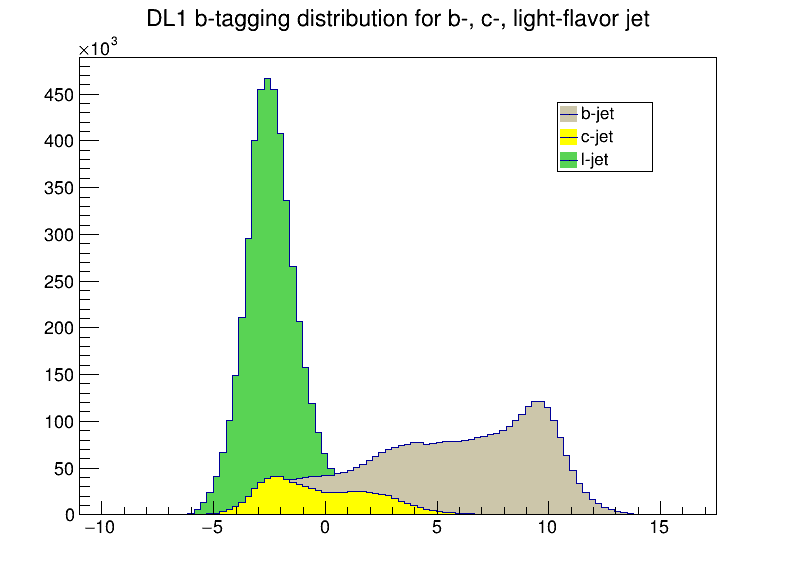

In [67]:
#Draw pT distribution for three jet
b_pT_plot = ROOT.TH1F("b-jet","b-taggin disriminant distribution",100,-11,17.5)
c_pT_plot = ROOT.TH1F("c-jet","b-tagging distribution",100,-11,17.5)
l_pT_plot = ROOT.TH1F("light-flavor jet","p-tagging distribution",100,-11,17.5)
b_pT_plot.SetFillColor(20)
c_pT_plot.SetFillColor(5)
l_pT_plot.SetFillColor(8)
b_pT_plot.GetYaxis().SetTitle("Number of events")
c_pT_plot.GetYaxis().SetTitle("Number of events")
l_pT_plot.GetYaxis().SetTitle("Number of events")
for i in b_btag:
    b_pT_plot.Fill(i)
for i in c_btag:
    c_pT_plot.Fill(i)
for i in l_btag:
    l_pT_plot.Fill(i)
stack = ROOT.THStack("b-taggomg stack", "DL1 b-tagging distribution for b-, c-, light-flavor jet")
stack.Add(l_pT_plot)
stack.Add(b_pT_plot)
stack.Add(c_pT_plot)
c = ROOT.TCanvas("pb","The Canvas Title",800,600)
stack.Draw("nostack")
c.Draw()
legend = ROOT.TLegend(0.7, 0.7 ,0.82 ,0.82)
legend.AddEntry(b_pT_plot, "b-jet")
legend.AddEntry(c_pT_plot, "c-jet")
legend.AddEntry(l_pT_plot, "l-jet")
legend.Draw()